# When will coronavirus peak?

## We are in a serious war against an invisible enemy.




https://www.talktomira.com/post/when-will-coronavirus-peak-and-end-social-distancing

Covid-19 tracking data are sourced from Kaggle: 

https://www.kaggle.com/imdevskp/corona-virus-report#usa_county_wise.csv

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports


In [12]:
# libraries and data
# import os
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt


## Data Loading

The spread of Covid-19 virus really started since early March. So we truncate our DataFrame since March 1, 2020. Thus, we subset our DataFrame since March.  

In [13]:
df_sum_state = pd.read_csv("df_sum_state.csv", parse_dates=['Date'])
df_sum_state = df_sum_state.set_index(['Province_State', 'Date']).fillna(0)

In [14]:
df_sum_state.tail(5)

Confirmed  Deaths  new_confirmed  new_death  \
Province_State Date                                                      
Wyoming        2020-04-11        261       0           22.0        0.0   
               2020-04-12        270       0            9.0        0.0   
               2020-04-13        275       1            5.0        1.0   
               2020-04-14        282       1            7.0        0.0   
               2020-04-15        287       1            5.0        0.0   

                           new_confirmed_growth  new_death_growth  death_rate  
Province_State Date                                                            
Wyoming        2020-04-11                  13.0               0.0    0.000000  
               2020-04-12                 -13.0               0.0    0.000000  
               2020-04-13                  -4.0               1.0    0.363636  
               2020-04-14                   2.0              -1.0    0.354610  
               2020-04-15                  -2.0               0.0    0.348432

In [15]:
df_sum_state_latest =df_sum_state[df_sum_state.index.get_level_values(1) == df_sum_state.index.get_level_values(1).max()]
states_new_confirmed_top15 = df_sum_state_latest.nlargest(15, 'new_confirmed').sort_values('new_confirmed', ascending=False).index.get_level_values(level=0)
states_new_confirmed_top15

Index(['New York', 'New Jersey', 'Massachusetts', 'Michigan', 'Illinois',
       'California', 'Pennsylvania', 'Texas', 'Florida', 'Connecticut',
       'Maryland', 'Ohio', 'Indiana', 'Louisiana', 'Georgia'],
      dtype='object', name='Province_State')

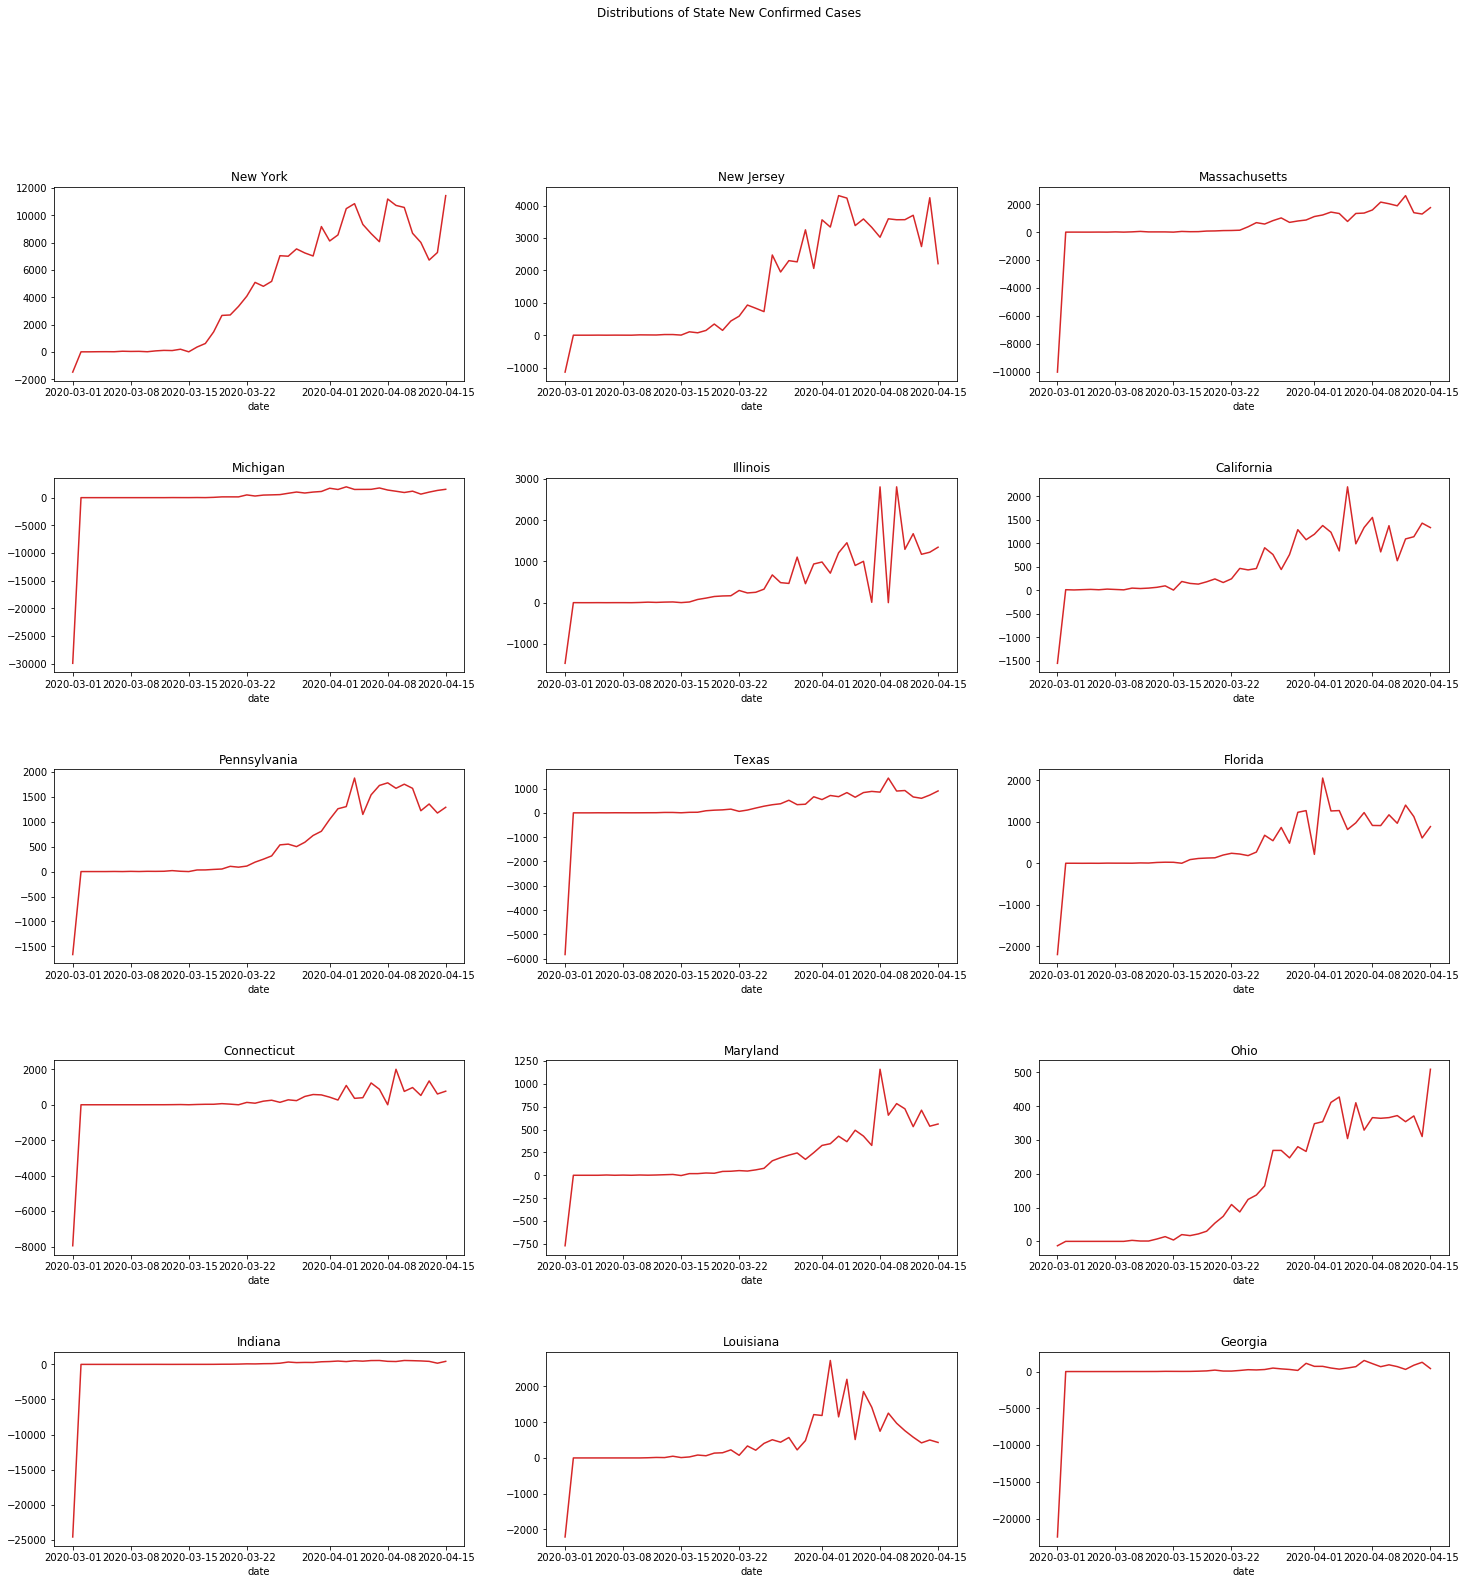

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25,25))
fig.subplots_adjust(hspace=.5)
fig.suptitle('Distributions of State New Confirmed Cases')

for ax1, ax2, state in zip(axes.flatten(), axes.flatten(), states_new_confirmed_top15): # objects in zip have the same dimension.
    df = df_sum_state.loc[(state, slice(None))]
    ax1.plot(df.new_confirmed, color = 'tab:red')
    ax1.set(title=state, xlabel='date')


In [17]:
import hvplot.pandas

def hvplot(avg, highlight):
    return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

def find_peak(state = 'New York', metrics='new_confirmed', window=3, sigma=2, view_fn=hvplot):
    data = df_sum_state.loc[(state, slice(None))]
    avg = data[metrics].rolling(window=window).mean()
    residual = data[metrics] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

In [18]:
import panel as pn
# pn.extension()

# pn.interact(find_peak)

In [19]:
kw = dict(state = df_sum_state.index.get_level_values(0).unique(), window=(1, 14), \
          metrics=['Confirmed', 'Deaths', 'new_confirmed', 'new_death', 'death_rate'], sigma=(1, 10))
i = pn.interact(find_peak, **kw)
i.pprint()


Column
    [0] Column
        [0] Select(name='state', options=['Alabama', 'Alaska', ...], value='New York')
        [1] Select(name='metrics', options=['Confirmed', ...], value='new_confirmed')
        [2] IntSlider(end=14, name='window', start=1, value=3)
        [3] IntSlider(end=10, name='sigma', start=1, value=2)
    [1] Row
        [0] HoloViews(Overlay, name='interactive02468')


In [20]:
text = "<br>\n# When will Coronavirus peak? \nSelect the state, metrics, and the time window for smoothing"

hvp   = pn.interact(find_peak, view_fn=hvplot, **kw)
pn.Column(pn.Row(pn.panel(text, width=400), hvp[0]), hvp[1]).servable("Occupancy")



Column
    [0] Row
        [0] Markdown(str, width=400)
        [1] Column
            [0] Select(name='state', options=['Alabama', 'Alaska', ...], value='New York')
            [1] Select(name='metrics', options=['Confirmed', ...], value='new_confirmed')
            [2] IntSlider(end=14, name='window', start=1, value=3)
            [3] IntSlider(end=10, name='sigma', start=1, value=2)
    [1] Row
        [0] HoloViews(Overlay, name='interactive02602')